In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [21]:
exp_dir = "./experiments_manual/"
naive_exp = "1-FullIns_4.col_naive_optim_1.1.0"
custom_exp = "1-FullIns_4.col_custom_optim_1.1.0"
anealing_exp = "1-FullIns_4.col_anealing_optim_1.1.0"


In [22]:
def join_dfs(dfs:list, df_names:list, target=str):
    if len(dfs) != len(df_names):
        raise ValueError
    
    result = pd.DataFrame()
    for name, df in zip(df_names, dfs):
        result[name] = df[target]

    return result

In [23]:
with open(os.path.join(exp_dir, naive_exp, f"{naive_exp}_data.csv")) as fin:
    naive_df = pd.read_csv(fin)
with open(os.path.join(exp_dir, custom_exp, f"{custom_exp}_data.csv")) as fin:
    custom_df = pd.read_csv(fin)
with open(os.path.join(exp_dir, anealing_exp, f"{anealing_exp}_data.csv")) as fin:
    anealing_df = pd.read_csv(fin)

# df_fitness = pd.DataFrame()
# df_fitness["naive"] = naive_df["fitness"]
# df_fitness["custom"] = custom_df["fitness"]
dfs = [naive_df, custom_df, anealing_df]
df_names = ["naive", "custom", "anealing"]
from functools import partial
join = partial(join_dfs, dfs=dfs, df_names=df_names)

df_fitness = join(target="fitness")
print(type(df_fitness))
df_conflicts = join(target="conflicts")
df_solution = join(target="solution_found")
df_best_generation = join(target="generation")

print("Mean Fitness")
print(df_fitness.mean(), "\n")
# ax = df_fitness.plot(kind="box", ylabel="Fitness")

print("Mean conflicts")
print(df_conflicts.mean(), "\n")
# df_conflicts.plot(kind="box", ylabel="Conflicts", ax=ax)

print("Solution Found")
print(df_solution.agg("sum")/100, "\n")

print("Mean Best Generation")
print(df_best_generation.mean())

<class 'pandas.core.frame.DataFrame'>
Mean Fitness
naive        6.536022
custom      38.150000
anealing    65.390000
dtype: float64 

Mean conflicts
naive       2.23
custom      0.00
anealing    0.00
dtype: float64 

Solution Found
naive       0.17
custom      1.00
anealing    1.00
dtype: float64 

Mean Best Generation
naive       10.52
custom       0.99
anealing    76.59
dtype: float64


<AxesSubplot:title={'center':'Best Generation'}>

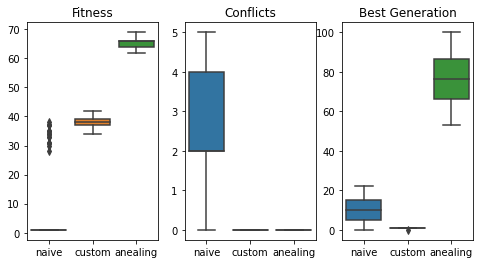

In [24]:
f, axs = plt.subplots(1, 3, figsize=(8, 4))

axs[0].set_title("Fitness")
sns.boxplot(data=df_fitness, ax=axs[0])

axs[1].set_title("Conflicts")
sns.boxplot(data=df_conflicts, ax=axs[1])

axs[2].set_title("Best Generation")
sns.boxplot(data=df_best_generation, ax=axs[2])

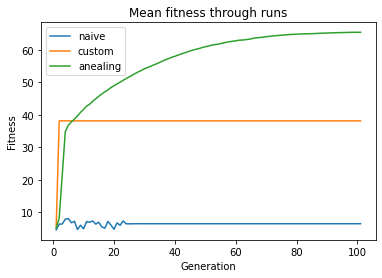

In [27]:
data_naive = np.genfromtxt(os.path.join(exp_dir, naive_exp, f"{naive_exp}_fitness"), delimiter=',')
data_custom = np.genfromtxt(os.path.join(exp_dir, custom_exp, f"{custom_exp}_fitness"), delimiter=',')
data_anealing = np.genfromtxt(os.path.join(exp_dir, anealing_exp, f"{anealing_exp}_fitness"), delimiter=',')

fig, ax = plt.subplots()
ax.set(title='Mean fitness through runs', xlabel='Generation', ylabel='Fitness')

_ = ax.plot(range(1, data_naive.shape[1]+1), data_naive.mean(axis=0), label="naive")
_ = ax.plot(range(1, data_custom.shape[1]+1), data_custom.mean(axis=0), label="custom")
_ = ax.plot(range(1, data_anealing.shape[1]+1), data_anealing.mean(axis=0), label="anealing")

ax.legend()

# fig.savefig(os.path.join(experiment_dir, fit_plot_fout_name))